# Program 4:  Performing Analysis On The Results
    Identifying hidden and latent features

#### Input:
    The predicted results from the tensorflow analysis.

#### Output
    An analysis of accuracy, probably existence of environmental features effecting scale and probable competitive and operational factors. 


Enable plotting in jupyter notebook: 'matplotlib inline'

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import csv
import pandas as pd
import numpy as np
import os as os
import datetime
from sklearn.externals.joblib import dump, load
from sklearn.preprocessing import MinMaxScaler

Read scaled results from predictions

In [3]:
def read_data():
    df = pd.read_csv('agg_data/Scaled_Results.csv')
    df.sort_values(by=['STORENUMBER','DATE'],inplace=True)
    df.reset_index(inplace=True,drop=True)
    return df

In [4]:
df = read_data()

Unscale predicted and actual sales using the inverse transforms stored by store number

In [7]:
def unscale_sales(df):
    stores=list(df.STORENUMBER.unique())
    S=[];PS=[]
    for s in stores:
        ss = [];ps = [];su = [];psu = [];ds = pd.DataFrame() 
        ds = df[df.STORENUMBER == s]
        scalename = str(s) + '_scaler'
        scaler = load(scalename)
        ss = np.array(ds.SCALED_ACTUAL_SALES).reshape(-1,1)
        ps = np.array(ds.SCALED_PREDICTED_SALES).reshape(-1,1)
        su = scaler.inverse_transform(ss)
        psu = scaler.inverse_transform(ps)
        su = [item for sublist in su for item in sublist]
        psu = [item for sublist in psu for item in sublist]
        su = [int(round(s)) for s in su]
        psu = [int(round(p)) for p in psu]
        S = S + list(su)
        PS = PS + list(psu)
    du = df.drop(['SCALED_ACTUAL_SALES','SCALED_PREDICTED_SALES'],axis=1,inplace=False)
    du['ACTUAL_SALES'] = S
    du['PREDICTED_SALES'] = PS
    du.reset_index(inplace=True,drop=True)
    du.to_csv('agg_data/Unscaled_Results.csv',index=False)
    return du 

In [8]:
du = unscale_sales(df)

Read latent data from predictions

In [9]:
 def read_latent_data():
    dl = pd.read_csv('agg_data/Scaled_Latents.csv')
    dl.sort_values(by=['STORENUMBER','DATE'],inplace=True)
    dl.reset_index(inplace=True,drop=True)
    return dl

In [10]:
dl = read_latent_data()

In [11]:
def latent_features_all(dl,n=6):
    dlu = dl[dl['LTAS'] > n]
    dlu = dlu.sort_values(by=['STORENUMBER','LTAS','DATE'])
    dlu.reset_index(inplace=True,drop=True)
    dld = dl[dl['LTAS'] < n]
    dld = dld.sort_values(by=['STORENUMBER','LTAS','DATE'])
    dld.reset_index(inplace=True,drop=True)
    return dlu,dld

Create latent events dataframes for both up and down events from all store features

In [12]:
dlau,dlad = latent_features_all(dl)

In [13]:
def latent_features_store(dl,n=6):
    dlu = dl[dl['LTS'] > n]
    dlu = dlu.sort_values(by=['STORENUMBER','LTS','DATE'])
    dlu.reset_index(inplace=True,drop=True)
    dld = dl[dl['LTS'] < n]
    dld = dld.sort_values(by=['STORENUMBER','LTS','DATE'])
    dld.reset_index(inplace=True,drop=True)
    return dlu,dld

In [14]:
dlsu,dlsd = latent_features_store(dl)

# Displaying The Results

In [15]:
from matplotlib import pyplot as plt

#### Mean Test Period Error
The mean percentage error during the test period is the critical metric.

In [16]:
def calculate_test_period_error(df):
    #calculate abs mean percentage error by storenumber
    sape = []
    storenumbers = list(df.STORENUMBER.unique())
    for storenumber in storenumbers:
        ds = df[df['STORENUMBER'] == storenumber]
        a = np.array(ds.SCALED_ACTUAL_SALES)
        p = np.array(ds.SCALED_PREDICTED_SALES)
        e = abs(a-p)
        d = (a+p)/2
        ape = (e/d).mean()
        sape.append(ape)
    mape = pd.DataFrame()
    mape['Storenumbers'] = storenumbers
    mape['Mean_Percent_Error'] = sape
    mape.reset_index(inplace=True,drop=True)

    #display bar chart of absolute error values
    plt.rcParams["figure.figsize"] = (12,12)
    objects = storenumbers
    y_pos = np.arange(len(storenumbers))
    performance = sape

    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel('Error')
    plt.title('Error By Storenumber')
    return

/home/dennis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


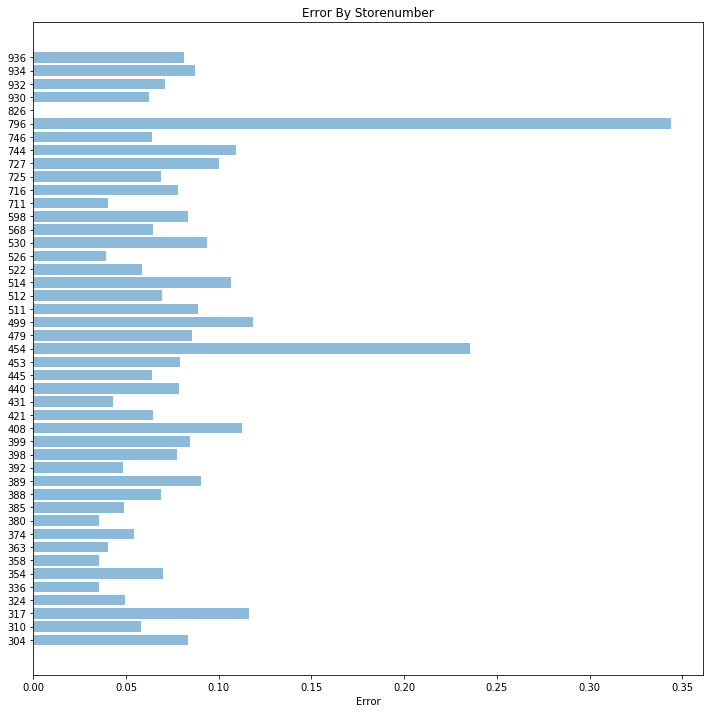

In [17]:
calculate_test_period_error(df)

### Observing Store Sales In Actual Dollars

##### Select storenumbers from this list.

In [18]:
du.STORENUMBER.unique()

array([304, 310, 317, 324, 336, 354, 358, 363, 374, 380, 385, 388, 389,
       392, 398, 399, 408, 421, 431, 440, 445, 453, 454, 479, 499, 511,
       512, 514, 522, 526, 530, 568, 598, 711, 716, 725, 727, 744, 746,
       796, 826, 930, 932, 934, 936])

##### Enter storenumbers in cell below: default = 336 and 431

In [19]:
storenumber1 = 336;storenumber2=431

In [20]:
def plot_store_sales(du,storenumber1=336,storenumber2=431):
    ds1 = du[du['STORENUMBER'] == storenumber1]
    ds2 = du[du['STORENUMBER'] == storenumber2]

    f,(ax1, ax2) = plt.subplots(2, 1, sharex=True,constrained_layout=True)
    f.suptitle('Comparing Actual And Predicted Sales: Storenumber:'+str(storenumber1)+'   Storenumer:'+str(storenumber2))
    plt.rcParams["figure.figsize"] = (12,8)

    ax1.plot('DATE','ACTUAL_SALES',data=ds1,color='blue',linewidth=2, label="Actual Sales")
    ax1.plot( 'DATE','PREDICTED_SALES',data=ds1,color='green', linewidth=2, label ="Predicted Sales")
    ax1.legend()
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Dollars')
    ax1.grid(True)

    ax2.plot('DATE','ACTUAL_SALES',data=ds2,color='blue',linewidth=2, label="Actual Sales")
    ax2.plot( 'DATE','PREDICTED_SALES',data=ds2,color='green', linewidth=2, label ="Predicted Sales")
    ax2.legend()
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Dollars')
    ax2.grid(True)
    ax2.set_xticks([0,7,14,21,28,35,42,49,56,63,70])
    return
    
    


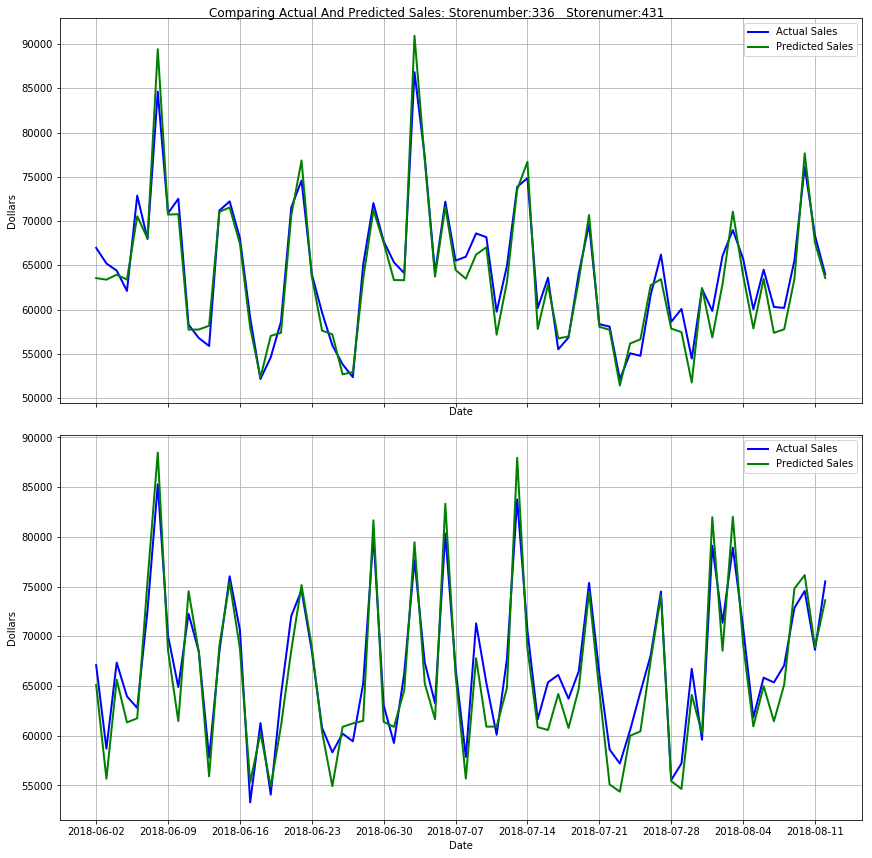

In [21]:
plot_store_sales(du, storenumber1 = 336, storenumber2 = 431)

## Observe latent features on all stores by order of strength and storenumber
For latent features same on all stores

Select storenumber from list

In [22]:
dl.STORENUMBER.unique()

array([304, 310, 317, 324, 336, 354, 358, 363, 374, 380, 385, 388, 389,
       392, 398, 399, 408, 421, 431, 440, 445, 453, 454, 479, 499, 511,
       512, 514, 522, 526, 530, 568, 598, 711, 716, 725, 727, 744, 746,
       796, 826, 930, 932, 934, 936])

In [23]:
storenumber = 304

### Observing Dates With Upward Pressure On Sales From Latent Features
Latent features are arranged by 11 being highest and 7 being lowest just above 75th  percentile

In [24]:
dlau[dlau['STORENUMBER'] == storenumber]

,DATE,STORENUMBER,SCALED_ACTUAL_SALES,SCALED_PREDICTED_SALES,LTS,LTAS
0,2018-06-08,304,0.571776,0.554662,8,7
1,2018-06-10,304,0.534817,0.517082,7,7
2,2018-06-29,304,0.520037,0.516982,7,7
3,2018-07-14,304,0.523656,0.515244,7,7
4,2018-07-04,304,0.615451,0.630579,8,8
5,2018-07-03,304,0.712382,0.732820,9,9


### Observing Dates With Downward Pressure On Sales From Latent Features¶
Latent features are arranged by 0 being highest and 5 being just below 25th percentile

In [25]:
dlad[dlad['STORENUMBER'] == storenumber]

,DATE,STORENUMBER,SCALED_ACTUAL_SALES,SCALED_PREDICTED_SALES,LTS,LTAS
0,2018-07-18,304,0.276341,0.261182,4,5
